# Introduction to `explainy`
In this notebook, we will go over the main functionalities of the library

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

from explainy.explanations.permutation_explanation import PermutationExplanation

Error: Session cannot generate requests

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

diabetes = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=0
)
X_test = pd.DataFrame(X_test, columns=diabetes.feature_names)
y_test = pd.DataFrame(y_test)

model = RandomForestRegressor(random_state=0).fit(X_train, y_train)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 251.8.
The feature importance was calculated using the Permutation Feature Importance method.
The four features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), and 'age' (0.02).


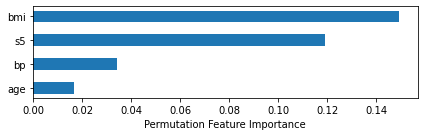

In [ ]:
number_of_features = 4
sample_index = 1

explainer = PermutationExplanation(X_test, y_test, model, number_of_features)

explanation = explainer.explain(sample_index)
print(explanation)
explainer.plot(kind='bar')

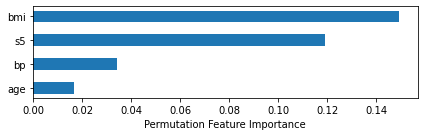

In [ ]:
explainer.plot(kind='box')

In [ ]:
from explainy.explanations.counterfactual_explanation import CounterfactualExplanation
from explainy.explanations.shap_explanation import ShapExplanation
from explainy.explanations.surrogate_model_explanation import SurrogateModelExplanation

samples_dict = {
    # name : (sample_index, number of features)
    "permutation": ([0, 1, 2], [2, 4, 6]),
    "shap": ([0, 1, 2], [2, 4, 6]),
    "surrogate": ([0], [2, 4, 6, 8, 10]),
    "counterfactual": ([0], [2, 4, 6, 8, 10]),
}

Error: Session cannot generate requests

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the Permutation Feature Importance method.
The two features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), and 's5' (0.12).


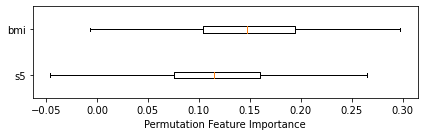

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the Permutation Feature Importance method.
The four features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), and 'age' (0.02).


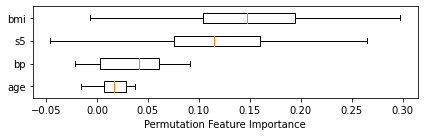

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the Permutation Feature Importance method.
The six features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), 'age' (0.02), 's2' (-0.00), and 'sex' (-0.00).


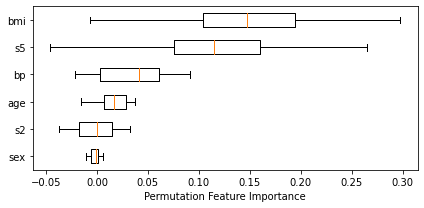

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the Permutation Feature Importance method.
The eight features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), 'age' (0.02), 's2' (-0.00), 'sex' (-0.00), 's3' (-0.00), and 's1' (-0.01).


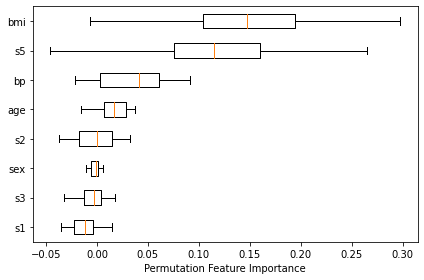

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 251.8.
The feature importance was calculated using the Permutation Feature Importance method.
The two features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), and 's5' (0.12).


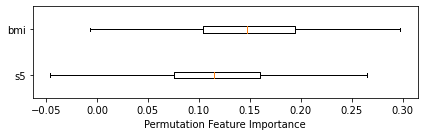

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 251.8.
The feature importance was calculated using the Permutation Feature Importance method.
The four features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), and 'age' (0.02).


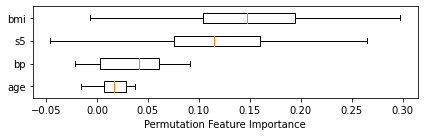

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 251.8.
The feature importance was calculated using the Permutation Feature Importance method.
The six features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), 'age' (0.02), 's2' (-0.00), and 'sex' (-0.00).


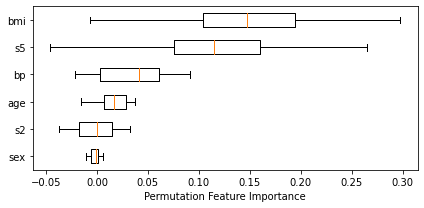

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 251.8.
The feature importance was calculated using the Permutation Feature Importance method.
The eight features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), 'age' (0.02), 's2' (-0.00), 'sex' (-0.00), 's3' (-0.00), and 's1' (-0.01).


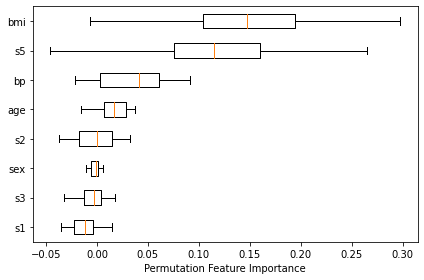

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance was calculated using the Permutation Feature Importance method.
The two features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), and 's5' (0.12).


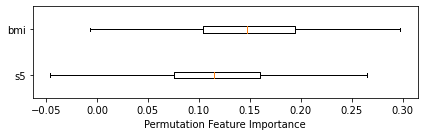

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance was calculated using the Permutation Feature Importance method.
The four features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), and 'age' (0.02).


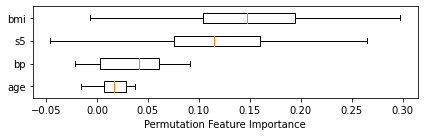

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance was calculated using the Permutation Feature Importance method.
The six features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), 'age' (0.02), 's2' (-0.00), and 'sex' (-0.00).


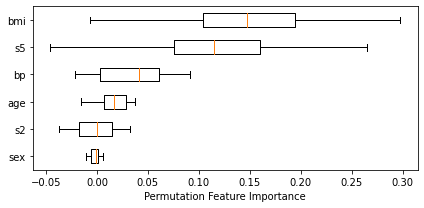

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance was calculated using the Permutation Feature Importance method.
The eight features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), 'age' (0.02), 's2' (-0.00), 'sex' (-0.00), 's3' (-0.00), and 's1' (-0.01).


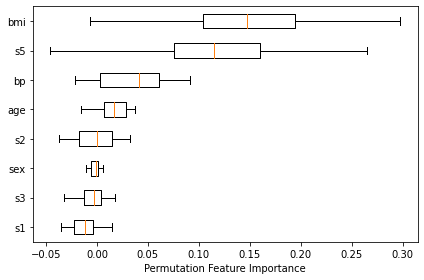

In [ ]:
# Global, Non-contrastive
samples = [0, 1]
list_number_of_features = [2, 4, 6, 8, 10]

for sample_index in samples:    
    for number_of_features in [2, 4, 6, 8]:
        explainer = PermutationExplanation(
            X_test, y_test, model, number_of_features
        )
        explanation = explainer.explain(sample_index)
        explainer.plot(kind='box')
        print(explanation)
        print('\n')

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the SHAP method.
The two features which were most important for this particular sample were (from highest to lowest): 'bmi' (76.27), and 'bp' (22.80).


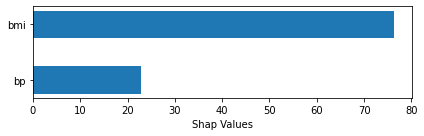

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 251.8.
The feature importance was calculated using the SHAP method.
The two features which were most important for this particular sample were (from highest to lowest): 'bmi' (49.63), and 's5' (41.66).


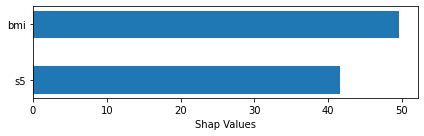

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance was calculated using the SHAP method.
The two features which were most important for this particular sample were (from highest to lowest): 'bmi' (22.48), and 's5' (-11.53).


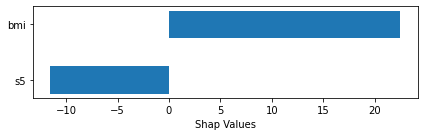

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the SHAP method.
The four features which were most important for this particular sample were (from highest to lowest): 'bmi' (76.27), 'bp' (22.80), 's5' (-5.95), and 's3' (4.48).


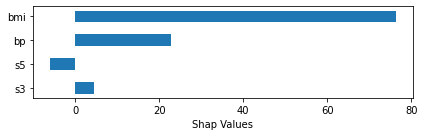

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 251.8.
The feature importance was calculated using the SHAP method.
The four features which were most important for this particular sample were (from highest to lowest): 'bmi' (49.63), 's5' (41.66), 'bp' (9.40), and 's6' (-4.04).


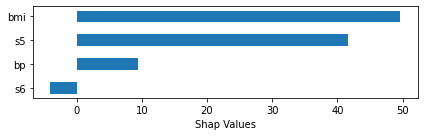

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance was calculated using the SHAP method.
The four features which were most important for this particular sample were (from highest to lowest): 'bmi' (22.48), 's5' (-11.53), 'bp' (9.70), and 's6' (-7.94).


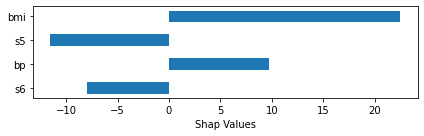

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the SHAP method.
The six features which were most important for this particular sample were (from highest to lowest): 'bmi' (76.27), 'bp' (22.80), 's5' (-5.95), 's3' (4.48), 's2' (2.81), and 's1' (2.69).


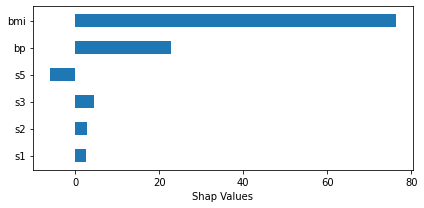

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 251.8.
The feature importance was calculated using the SHAP method.
The six features which were most important for this particular sample were (from highest to lowest): 'bmi' (49.63), 's5' (41.66), 'bp' (9.40), 's6' (-4.04), 'age' (-2.41), and 's3' (2.25).


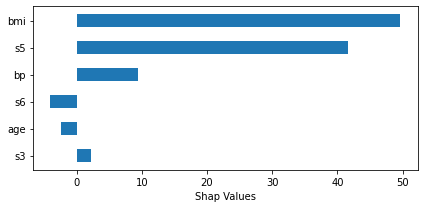

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance was calculated using the SHAP method.
The six features which were most important for this particular sample were (from highest to lowest): 'bmi' (22.48), 's5' (-11.53), 'bp' (9.70), 's6' (-7.94), 's3' (4.67), and 'sex' (-1.49).


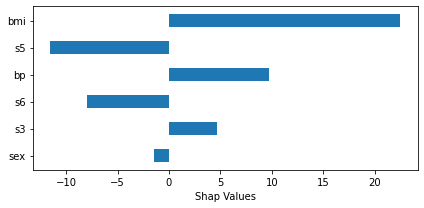

In [ ]:
# Local, Non-contrastive
samples, list_number_of_features = samples_dict["shap"]
for number_of_features in list_number_of_features:
    for sample_index in samples:

        explainer = ShapExplanation(
            X_test, y_test, model, number_of_features
        )
        explanation = explainer.explain(sample_index)
        explainer.plot(sample_index)
        print(explanation)
        print('\n')


In [ ]:
# Global, Contrastive
samples, list_number_of_features = samples_dict["surrogate"]
for number_of_features in list_number_of_features:
    for sample_index in samples:

        explainer = SurrogateModelExplanation(
            X_test, y_test, model, number_of_features
        )
        explanation = explainer.explain(sample_index)
        explainer.plot(sample_index)
        print(explanation)
        print('\n')


Error: Session cannot generate requests

In [ ]:
# Local, Contrastive
samples, list_number_of_features = samples_dict["counterfactual"]
for number_of_features in list_number_of_features:
    for sample_index in samples:
        explainer = CounterfactualExplanation(
            X_test, y_test, model, number_of_features
        )
        explanation = explainer.explain(sample_index)
        explainer.plot(sample_index)
        print(explanation)
        print('\n')


Error: Session cannot generate requests